In [70]:
# Initialize Otter
%pip install otter-grader
import otter
grader = otter.Notebook("HW 2 - Logistic Regression.ipynb")

Note: you may need to restart the kernel to use updated packages.


### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the autograder output.     
Autograded quesions may have hidden tests and/or public tests. You can see the public test results when you run the notebook with otter grader. Usually public tests are for simple checks (such as variable types) and may not indicate that the answer is correct.     
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

# Logistic Regression

In [71]:
# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## Part A. Understanding Logistic Function

### Q1. [5 points] 
Your first task is to complete the function `gen_logistic` in the following cell so as to be able to generate the logistic function for a given input. The logistic function is a type of <em>sigmoid</em> function which has an 'S'-shape and 'squashes' its inputs to a value lying in the range [0,1]. Other sigmoid functions include the hyperbolic-tangent funcition (`tanh(x)`) and the error function (`erf(x)`).[https://en.wikipedia.org/wiki/Sigmoid_function].     
Hint: In the logistic function, the variable of the logistic function is the logit $z = w \cdot x +b$.

In [72]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input x (Please do not use external libraries) store 
    # the output in y and return y. Do not change the default parameter values.
    # Hint: This function will be used in any input shape scalar (0d), 1d vector, and 2d arrays. Please make sure it can handle all those. Following reshaping codes might help.
    # Hint2: You may use design matrix using concatenation (e.g. np.concat), but it is not necesary.
    
    if np.isscalar(x):
        x = np.array(x).reshape((1,1))
    if np.isscalar(w):
        w = np.array(w).reshape((1,1))
    if np.isscalar(b):
        b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
        b= b.reshape((1,1))  
    z = np.dot(x, w.T) + b
    y = 1 / (1 + np.exp(-z))
    return y.reshape(y.shape[0],)


<!-- BEGIN QUESTION -->

### Q2. Role of parameters in a logistic function [10 pts] 
**2-a) [5 points]:** Generate a vector x of length N with values lying between limits Xa and Xb (for this you will have to choose your own limits; play around with different values) and apply the `gen_logistic` function to this vector.  Proceed to plot the output and verify the shape of the output. If your decision boundary value is about the center of your x range, you will see an S-shape. Your final plot should show the S-curve. 

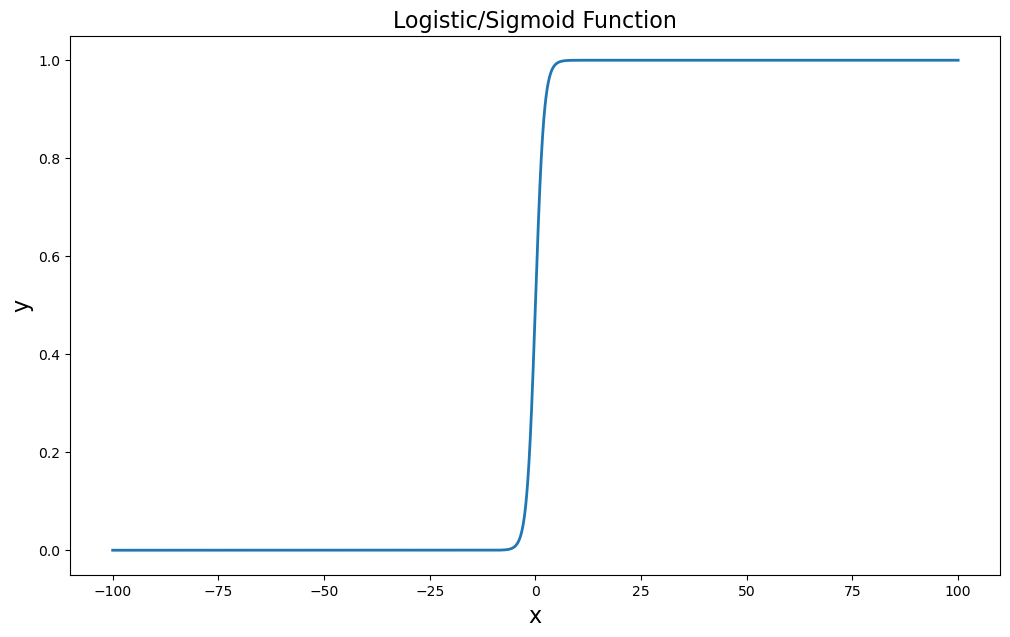

In [73]:
# TODO: change the values of N, a and b below to check how the output of your function works
# Use a value for N greater than 1 and any limits a and b so that an S-shape graph is generated

N = 10000
Xa = -100
Xb = 100
w = 1
b = 0



x = np.expand_dims(np.linspace(Xa,Xb,N), axis=1)
y = gen_logistic(x, w, b)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(x,y, lw=2)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Logistic/Sigmoid Function", fontsize=16)

plt.show()


<!-- END QUESTION -->

###  Answer following questions
#### 2-b) Increasing w will make the curve transition sharply: [2 pts, True/False]

In [74]:
# uncomment sharp_transition and answer qustion 1. above 
# replace string with 'True' or 'False' 
sharp_transition = 'True'

#### 2-c) If b increases by 1, then the decision boundary x decreases by 1: [1 pts, True/False]

In [75]:
# uncomment x_decreases_by_1 and answer question 2. above
# replace string with 'True' or 'False' 
x_decreases_by_1 = 'False'

#### 2-d) If $w$'s sign flips (and no change in the non-zero-valued $b$), the logistic curve flips vertically without changing the boundary threshold's position. [2 pts, True/False]

In [76]:
# uncomment vertical_flip and answer question 3. above
# replace string with 'True' or 'False' 
vertical_flip = 'True'

# Part B. Logistic regression using Scikit-learn

### Q3.  [10 pts]
Performing binary classification using logistic regression on the breast-cancer dataset. In this part you will be exposed to different methods within the scikit-learn LogisticRegression class so you can build a classifier. In this part, we will use breast cancer data from sklean dataset library.

#### 3-a)  Complete below codes to split train and test data  [5 pts]

In [77]:
# Importing the breast-cancer dataset from sklearn datasets

class BC_data:
    """
    class to import the breast cancer dataset from sklearn
    
    """
    def __init__(self):
        
        x, y = load_breast_cancer(return_X_y= True)
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        
        #TODO: Split the data into training and test data (use train_test_split sklearn) 
        # such that the test data size is 25% of total number of observations
        # No need to rescale the data. Use the data as is.
        
        self.xTrain, self.xTest = train_test_split(x, test_size=0.25, random_state=0)
        self.yTrain, self.yTest = train_test_split(y, test_size=0.25, random_state=0)
        
        
data = BC_data()

#### 3-b) Build and Fit Logistic Regression Model [5 pts]

In [78]:
# TODO: Use the data object and then train the logistic regression model. 
# 1. Change the code below to build your model called LogReg
# 2. Fit the model to the train data

LogReg = LogisticRegression(max_iter=10000)

LogReg.fit(data.xTrain, data.yTrain)

LogisticRegression(max_iter=10000)

<!-- BEGIN QUESTION -->

#### 3-c. Print out prediction probability and prediction labels from the above model (from the sklearn library) using test data. [5 pts]
Explain 1) why there are two columns in the prediction probability output, and 2) how you can manually obtain prediction label from the prediction probability output. 

#### 3-c. Solution

1. There are two columns because this model is classifying the results in a binary manner. The first column represents the probability of the first class and the second is the second class' as well.
2. You can use argmax to get the prediction label from the prediction probability output.

In [79]:
yPred = LogReg.predict(data.xTest)

yProbs = LogReg.predict_proba(data.xTest)

for i in range(len(yPred)):
    print('-' * 40)
    print(f"Sample {i+1}:")
    print(f"Predicted label: {yPred[i]}")
    print(f"Predicted probability: {yProbs[i]}")
    print('-' * 40)

----------------------------------------
Sample 1:
Predicted label: 0
Predicted probability: [0.99516202 0.00483798]
----------------------------------------
----------------------------------------
Sample 2:
Predicted label: 1
Predicted probability: [0.03173456 0.96826544]
----------------------------------------
----------------------------------------
Sample 3:
Predicted label: 1
Predicted probability: [0.00150948 0.99849052]
----------------------------------------
----------------------------------------
Sample 4:
Predicted label: 1
Predicted probability: [0.15917885 0.84082115]
----------------------------------------
----------------------------------------
Sample 5:
Predicted label: 1
Predicted probability: [3.37964304e-05 9.99966204e-01]
----------------------------------------
----------------------------------------
Sample 6:
Predicted label: 1
Predicted probability: [7.09294100e-04 9.99290706e-01]
----------------------------------------
------------------------------------

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Part C. Understanding classification performance metrics

### Q4. ROC curve  [10 pts] 
In the next cell, compute the ROC curve and the area under the curve and plot the ROC curve. Your ROC curve plot also should display area under the curve.       
Hint: Use relevant functions in sklearn.metrics. Feel free to refer to the sklearn documentation's examples.

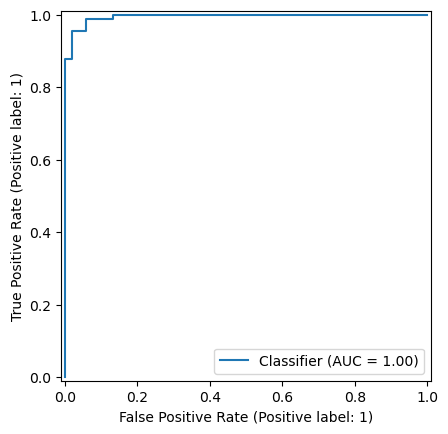

In [80]:
# TODO: compute the area under the curve and plot ROC curve
# Plot the ROC curve ( True positive rate v/s False positive rate) and indicate the AUC on the plot

from sklearn.metrics import RocCurveDisplay, recall_score, precision_score

RocCurveDisplay.from_predictions(data.yTest, yProbs[:, 1])

<!-- END QUESTION -->

### Q5. Precision and Recall [10 pts]
Here we will use the trained model coefficients and generate the `classification probabilities` using the `gen_logistic` function we built. The goal of this section is to make you understand how logistic regression classifies data points during and after training. Using the predictions from the generated probabilities, you will compute the precision and recall metrics (defined below).

#### Q5a. Complete the code below to implement precision function. [5 pts]
Assume positive label is 1 and negative label is 0

In [81]:
def calculate_precision(y_true, y_pred):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    return precision_score(y_true, y_pred)


In [82]:
grader.check("q5a")

q5a results: All test cases passed!

#### Q5b. Complete the code below to implement recall function. [5 pts]
 Assume positive label is 1 and negative label is 0

In [83]:
def calculate_recall(y_true, y_pred):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    return recall_score(y_true, y_pred)

In [84]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q6. Putting things together [10 pts]

In the next cell you will generate the predictions for the test data `data.x_test` and compute prediction and recall metrics by calling the functions you built above. 
STEP1. Get weight and bias from your fitted model (sklearn model)     
STEP2. Plug weight and bias and test data into your `gen_logistic` function to get prediction probability.    
STEP3. From the predicion probability output from STEP2, calculate prediction label (y_pred).    


In [85]:
# TO-DO : Generate predicted y values using coefficients of the fit logistic regression model for data.x_test
# Then compute and print the precision and recall metrics 

log = gen_logistic(data.xTest, LogReg.coef_, LogReg.intercept_)

y_pred = np.where(log > 0.5, 1, 0)

# Checking your results. Do not modify codes below.
print(y_pred.shape)
precision = calculate_precision(data.yTest, y_pred)
recall = calculate_recall(data.yTest, y_pred)



print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)


(143,)
Model Precision : 0.99
Model Recall : 0.93


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [86]:
grader.check_all()

q2b results: All test cases passed!

q2c results: All test cases passed!

q2d results: All test cases passed!

q3a results: All test cases passed!

q3b results: All test cases passed!

q5a results: All test cases passed!

q5b results: All test cases passed!

qA results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [87]:
# Save your notebook first, then run this cell to export your submission.
grader.export()